In [206]:
# Import required libraries and dependencies
import os
os.environ["OMP_NUM_THREADS"] = "1"
import pandas as pd
import hvplot.pandas
import hvplot as hv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np



In [208]:
# Load the data into a Pandas DataFrame
crypto_data_path = "/mnt/data/crypto_market_data.csv"
df_market_data = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
df_market_data.head(10)

price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                    
bitcoin                              1.08388                     7.60278   
ethereum                             0.22392                    10.38134   
tether                              -0.21173                     0.04935   
ripple                              -0.37819                    -0.60926   
bitcoin-cash                         2.90585                    17.09717   
binancecoin                          2.10423                    12.85511   
chainlink                           -0.23935                    20.69459   
cardano                              0.00322                    13.99302   
litecoin                            -0.06341                     6.60221   
bitcoin-cash-sv                      0.92530                     3.29641   

                 price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                     
bitcoin                              6.57509                      7.67258   
ethereum                             4.80849                      0.13169   
tether                               0.00640                     -0.04237   
ripple                               2.24984                      0.23455   
bitcoin-cash                        14.75334                     15.74903   
binancecoin                          6.80688                      0.05865   
chainlink                            9.30098                    -11.21747   
cardano                              5.55476                     10.10553   
litecoin                             7.28931                      1.21662   
bitcoin-cash-sv                     -1.86656                      2.88926   

                 price_change_percentage_60d  price_change_percentage_200d  \
coin_id                                                                      
bitcoin                             -3.25185                      83.51840   
ethereum                           -12.88890                     186.77418   
tether                               0.28037                      -0.00542   
ripple                             -17.55245                      39.53888   
bitcoin-cash                       -13.71793                      21.66042   
binancecoin                         36.33486                     155.61937   
chainlink                          -43.69522                     403.22917   
cardano                            -22.84776                     264.51418   
litecoin                           -17.23960                      27.49919   
bitcoin-cash-sv                    -24.87434                       7.42562   

                 price_change_percentage_1y  
coin_id                                      
bitcoin                            37.51761  
ethereum                          101.96023  
tether                              0.01954  
ripple                            -16.60193  
bitcoin-cash                       14.49384  
binancecoin                        69.69195  
chainlink                         325.13186  
cardano                           156.09756  
litecoin                          -12.66408  
bitcoin-cash-sv                    93.73082

In [210]:
# Generate summary statistics
summary_stats = df_market_data.describe()

print(summary_stats)

       price_change_percentage_24h  price_change_percentage_7d  \
count                    41.000000                   41.000000   
mean                     -0.269686                    4.497147   
std                       2.694793                    6.375218   
min                     -13.527860                   -6.094560   
25%                      -0.608970                    0.047260   
50%                      -0.063410                    3.296410   
75%                       0.612090                    7.602780   
max                       4.840330                   20.694590   

       price_change_percentage_14d  price_change_percentage_30d  \
count                    41.000000                    41.000000   
mean                      0.185787                     1.545693   
std                       8.376939                    26.344218   
min                     -18.158900                   -34.705480   
25%                      -5.026620                   -10.438470   
50%

In [212]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)


:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [216]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
df_market_data_scaled = scaler.fit_transform(df_market_data)

In [218]:
# Create a DataFrame with the scaled data
df_market_data_scaled_df = pd.DataFrame(df_market_data_scaled, columns=df_market_data.columns, index=df_market_data.index)

# Copy the crypto names from the original DataFrame
crypto_names = df_market_data.index.tolist()
# Set the coin_id column as index *(already completed)*


# Display the scaled DataFrame
df_market_data_scaled_df

price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                         
bitcoin                                  0.508529                    0.493193   
ethereum                                 0.185446                    0.934445   
tether                                   0.021774                   -0.706337   
ripple                                  -0.040764                   -0.810928   
bitcoin-cash                             1.193036                    2.000959   
binancecoin                              0.891871                    1.327295   
chainlink                                0.011397                    2.572251   
cardano                                  0.102530                    1.508001   
litecoin                                 0.077497                    0.334297   
bitcoin-cash-sv                          0.448952                   -0.190684   
crypto-com-chain                         0.331280                   -1.614844   
usd-coin                                 0.034352                   -0.733026   
eos                                      0.155710                   -0.922491   
monero                                   0.262723                    1.792602   
tron                                     0.130050                   -0.041018   
tezos                                   -0.151583                    0.708196   
okb                                     -0.923203                   -1.437359   
stellar                                 -0.277543                   -0.385209   
cosmos                                  -0.255978                    1.840274   
cdai                                     0.180851                   -0.704931   
neo                                      0.286546                   -0.326301   
wrapped-bitcoin                          0.515453                    0.461843   
leo-token                                0.051758                   -0.928381   
huobi-token                             -0.052032                   -0.457229   
nem                                     -0.217984                   -0.849381   
binance-usd                              0.061339                   -0.706669   
iota                                     0.259097                    0.249508   
vechain                                  0.585089                   -0.994231   
zcash                                   -0.127467                    0.929119   
theta-token                             -1.612188                   -1.682027   
dash                                    -0.296940                    0.094763   
ethereum-classic                        -0.071312                   -0.229484   
ethlend                                 -4.981042                   -0.045178   
maker                                   -0.125168                    0.580730   
havven                                  -1.428574                   -0.025510   
omisego                                  1.919812                    0.370447   
celsius-degree-token                     1.045530                   -0.618328   
ontology                                -0.409044                   -0.906963   
ftx-token                                0.414711                    0.414044   
true-usd                                 0.078038                   -0.687745   
digibyte                                 1.217453                   -0.607714   

                      price_change_percentage_14d  \
coin_id                                             
bitcoin                                  0.772200   
ethereum                                 0.558692   
tether                                  -0.021680   
ripple                                   0.249458   
bitcoin-cash                             1.760610   
binancecoin                              0.800214   
chainlink                                1.101647   
cardano                                  0.648885   
litecoin

---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [222]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1,12))

In [224]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of 
# disregard warnings that appeared after running KMeans
import warnings
warnings.filterwarnings("ignore", category = UserWarning)
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_market_data_scaled_df)
    inertia_values.append(kmeans.inertia_)


In [225]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

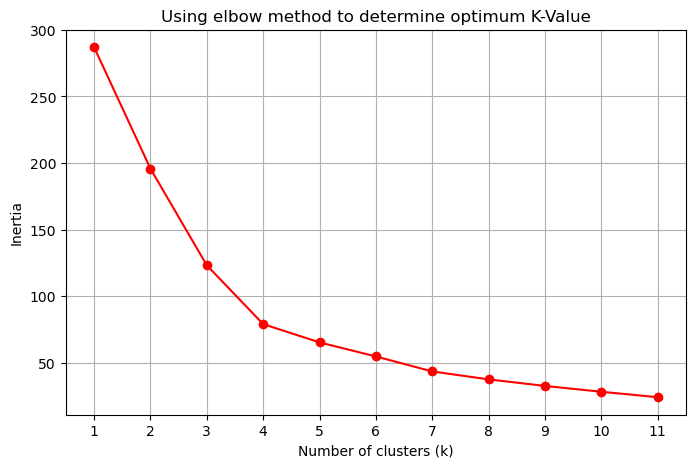

In [226]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 5))
plt.plot(elbow_df["k"], elbow_df["inertia"], marker="o", linestyle="-", color="red")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Using elbow method to determine optimum K-Value")
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The optimum k-value is 4.

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [230]:
# Initialize the K-Means model using the best value for k
kmeans_original = KMeans(n_clusters=4, random_state=42, n_init=10)

In [231]:
# Fit the K-Means model using the scaled DataFrame
kmeans_original.fit(df_market_data_scaled_df)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [232]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
cluster_labels_original = kmeans_original.predict(df_market_data_scaled_df)

# Print the resulting array of cluster values.
print("CLuster Labels from Original Data:", cluster_labels_original)

CLuster Labels from Original Data: [0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [233]:
# Create a copy of the scaled DataFrame
df_market_data_clusters_original = df_market_data_scaled_df.copy()

In [234]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_market_data_clusters_original["Cluster"] = cluster_labels_original
# Display the copy of the scaled DataFrame
df_market_data_clusters_original.head()

price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610                     0.545842   

              price_change_percentage_60d  price_change_percentage_200d  \
coin_id                                                                   
bitcoin                         -0.067495                     -0.355953   
ethereum                        -0.273483                     -0.115759   
tether                           0.008005                     -0.550247   
ripple                          -0.373164                     -0.458259   
bitcoin-cash                    -0.291203                     -0.499848   

              price_change_percentage_1y  Cluster  
coin_id                                            
bitcoin                        -0.251637        0  
ethereum                       -0.199352        0  
tether                         -0.282061        2  
ripple                         -0.295546        2  
bitcoin-cash                   -0.270317        0

In [235]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point
scatter_plot = df_market_data_clusters_original.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="Cluster",  
    hover_cols=["Cluster"], 
    title="Cryptocurrency Clustering (K-Means)",
    xlabel="Price Change Percentage (24h)",
    ylabel="Price Change Percentage (7d)",
    width=800,
    height=600
)

scatter_plot



:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster)

---

### Optimize Clusters with Principal Component Analysis.

In [238]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [239]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.

df_market_data_pca = pca.fit_transform(df_market_data_scaled_df)
# View the scaled PCA data
df_market_data_pca

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527],
       [-0.51653377,  1.38837748,  0.80407131],
       [-0.45071134,  0.51769912,  2.84614316],
       [-0.34559977,  0.72943939,  1.47801284],
       [-0.64946792,  0.43216514,  0.60030286],
       [-0.75901394, -0.20119979, -0.21765292],
       [-0.24819846, -1.37625159, -1.46202571],
       [-0.43840762, -0.17533654, -0.6633884 ],
       [-0.69342533, -0.47381462, -0.52759693],
       [ 0.06049915,  2.90940385,  1.49857131],
       [-0.39335243, -0.10819197, -0.01275608],
       [-0.79617564, -0.49440875,  1.08281169],
       [ 0.06407452, -1.26982514, -1.09882928],
       [-0.48901506, -0.73271912, -0.06254323],
       [-0.3062723 ,  0.70341515,  1.71422359],
       [-0.51352775, -0.14280239, -0.65656583],
       [-0.36212044, -0.98691441, -0.728

In [240]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_

#printing total explained variance by 3 principal components, convert to percentage
total_explained_variance = sum(explained_variance) * 100
print(f"Total explained variance PCA components: {total_explained_variance: .2f}%")

Total explained variance PCA components:  89.50%


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 89.50%


In [242]:
# Create a new DataFrame with the PCA data.
df_market_data_pca_df = pd.DataFrame(df_market_data_pca, columns=["PC1", "PC2", "PC3"], index=df_market_data_scaled_df.index)
# Copy the crypto names from the original scaled DataFrame
df_market_data_pca_df["Crypto Name"] = df_market_data.index

# Set the coin_id column as index


# Display the scaled PCA DataFrame
df_market_data_pca_df

PC1       PC2       PC3           Crypto Name
coin_id                                                                 
bitcoin              -0.600667  0.842760  0.461595               bitcoin
ethereum             -0.458261  0.458466  0.952877              ethereum
tether               -0.433070 -0.168126 -0.641752                tether
ripple               -0.471835 -0.222660 -0.479053                ripple
bitcoin-cash         -1.157800  2.041209  1.859715          bitcoin-cash
binancecoin          -0.516534  1.388377  0.804071           binancecoin
chainlink            -0.450711  0.517699  2.846143             chainlink
cardano              -0.345600  0.729439  1.478013               cardano
litecoin             -0.649468  0.432165  0.600303              litecoin
bitcoin-cash-sv      -0.759014 -0.201200 -0.217653       bitcoin-cash-sv
crypto-com-chain     -0.248198 -1.376252 -1.462026      crypto-com-chain
usd-coin             -0.438408 -0.175337 -0.663388              usd-coin
eos                  -0.693425 -0.473815 -0.527597                   eos
monero                0.060499  2.909404  1.498571                monero
tron                 -0.393352 -0.108192 -0.012756                  tron
tezos                -0.796176 -0.494409  1.082812                 tezos
okb                   0.064075 -1.269825 -1.098829                   okb
stellar              -0.489015 -0.732719 -0.062543               stellar
cosmos               -0.306272  0.703415  1.714224                cosmos
cdai                 -0.513528 -0.142802 -0.656566                  cdai
neo                  -0.362120 -0.986914 -0.728752                   neo
wrapped-bitcoin      -0.604265  0.827398  0.439316       wrapped-bitcoin
leo-token            -0.413296 -0.674115 -1.076628             leo-token
huobi-token          -0.407483 -0.212507 -0.351426           huobi-token
nem                   0.608974  0.563532 -1.148742                   nem
binance-usd          -0.450211 -0.151019 -0.647401           binance-usd
iota                 -0.764665 -0.517886  0.204990                  iota
vechain              -0.556315 -1.938209 -1.261776               vechain
zcash                -0.425147  0.492976  1.058048                 zcash
theta-token           2.676868 -0.013954 -1.965207           theta-token
dash                 -0.613923 -0.479337  0.339565                  dash
ethereum-classic     -0.579924 -0.356334 -0.114942      ethereum-classic
ethlend               8.089018 -3.896891  2.301382               ethlend
maker                -0.389045  0.165041  0.379414                 maker
havven                0.865762 -2.261882  0.275583                havven
omisego               0.111675  0.428316 -1.205398               omisego
celsius-degree-token  4.792395  6.767679 -1.986985  celsius-degree-token
ontology             -0.632355 -2.108117 -0.652227              ontology
ftx-token            -0.593142  0.021485  0.209911             ftx-token
true-usd             -0.458131 -0.135734 -0.635284              true-usd
digibyte             -0.297910 -0.191126 -0.909602              digibyte

---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [245]:
# Create a list with the number of k-values from 1 to 11
k_values_pca = list(range(1, 12))

In [246]:
# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list

#ensuring only numerical columns, not strings, will be passed to KMEANS
df_market_data_pca_numeric = df_market_data_pca_df.drop(columns=["Crypto Name"], errors="ignore")
for k in k_values_pca:
    kmeans_pca = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_pca.fit(df_market_data_pca_numeric)
    inertia_values_pca.append(kmeans_pca.inertia_)

In [247]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k": k_values_pca, "inertia": inertia_values_pca}
# Create a DataFrame with the data to plot the Elbow curve
elbow_df_pca = pd.DataFrame(elbow_data_pca)

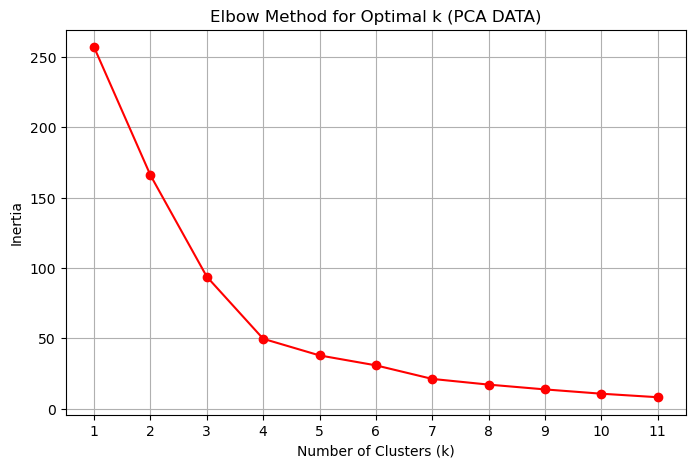

In [248]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 5))
plt.plot(elbow_df_pca["k"], elbow_df_pca["inertia"], marker="o", linestyle="-", color="red")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k (PCA DATA)")
plt.xticks(k_values_pca)
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No
  * 

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [255]:
# Initialize the K-Means model using the best value for k
best_k_pca = 4
kmeans_pca = KMeans(n_clusters=best_k_pca, random_state=42, n_init=10)

In [256]:
# Fit the K-Means model using the PCA data
df_market_data_pca_numeric = df_market_data_pca_df.select_dtypes(include=[np.number])
kmeans_pca.fit(df_market_data_pca_numeric)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [257]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
cluster_labels_pca = kmeans_pca.predict(df_market_data_pca_numeric)
# Print the resulting array of cluster values.
cluster_labels_pca


array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 2, 2, 1, 2, 2, 2, 2])

In [262]:
# Create a copy of the scaled PCA DataFrame
df_market_data_pca_clusters = df_market_data_pca_df.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters

df_market_data_pca_clusters["Cluster"] = cluster_labels_pca
# Display the copy of the scaled PCA DataFrame
df_market_data_pca_clusters

PC1       PC2       PC3           Crypto Name  \
coin_id                                                                    
bitcoin              -0.600667  0.842760  0.461595               bitcoin   
ethereum             -0.458261  0.458466  0.952877              ethereum   
tether               -0.433070 -0.168126 -0.641752                tether   
ripple               -0.471835 -0.222660 -0.479053                ripple   
bitcoin-cash         -1.157800  2.041209  1.859715          bitcoin-cash   
binancecoin          -0.516534  1.388377  0.804071           binancecoin   
chainlink            -0.450711  0.517699  2.846143             chainlink   
cardano              -0.345600  0.729439  1.478013               cardano   
litecoin             -0.649468  0.432165  0.600303              litecoin   
bitcoin-cash-sv      -0.759014 -0.201200 -0.217653       bitcoin-cash-sv   
crypto-com-chain     -0.248198 -1.376252 -1.462026      crypto-com-chain   
usd-coin             -0.438408 -0.175337 -0.663388              usd-coin   
eos                  -0.693425 -0.473815 -0.527597                   eos   
monero                0.060499  2.909404  1.498571                monero   
tron                 -0.393352 -0.108192 -0.012756                  tron   
tezos                -0.796176 -0.494409  1.082812                 tezos   
okb                   0.064075 -1.269825 -1.098829                   okb   
stellar              -0.489015 -0.732719 -0.062543               stellar   
cosmos               -0.306272  0.703415  1.714224                cosmos   
cdai                 -0.513528 -0.142802 -0.656566                  cdai   
neo                  -0.362120 -0.986914 -0.728752                   neo   
wrapped-bitcoin      -0.604265  0.827398  0.439316       wrapped-bitcoin   
leo-token            -0.413296 -0.674115 -1.076628             leo-token   
huobi-token          -0.407483 -0.212507 -0.351426           huobi-token   
nem                   0.608974  0.563532 -1.148742                   nem   
binance-usd          -0.450211 -0.151019 -0.647401           binance-usd   
iota                 -0.764665 -0.517886  0.204990                  iota   
vechain              -0.556315 -1.938209 -1.261776               vechain   
zcash                -0.425147  0.492976  1.058048                 zcash   
theta-token           2.676868 -0.013954 -1.965207           theta-token   
dash                 -0.613923 -0.479337  0.339565                  dash   
ethereum-classic     -0.579924 -0.356334 -0.114942      ethereum-classic   
ethlend               8.089018 -3.896891  2.301382               ethlend   
maker                -0.389045  0.165041  0.379414                 maker   
havven                0.865762 -2.261882  0.275583                havven   
omisego               0.111675  0.428316 -1.205398               omisego   
celsius-degree-token  4.792395  6.767679 -1.986985  celsius-degree-token   
ontology             -0.632355 -2.108117 -0.652227              ontology   
ftx-token            -0.593142  0.021485  0.209911             ftx-token   
true-usd             -0.458131 -0.135734 -0.635284              true-usd   
digibyte             -0.297910 -0.191126 -0.909602              digibyte   

                      Cluster  
coin_id                        
bitcoin                     0  
ethereum                    0  
tether                      2  
ripple                      2  
bitcoin-cash                0  
binancecoin                 0  
chainlink                   0  
cardano                     0  
litecoin                    0  
bitcoin-cash-sv             2  
crypto-com-chain            2  
usd-coin                    2  
eos                         2  
monero                      0  
tron                        2  
tezos                       0  
okb                         2  
stellar                     2  
cosmos                      0  
cdai                        2  
neo                         2  
wrapped-bitcoin       

In [263]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
scatter_plot_pca = df_market_data_pca_clusters.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="Cluster",
    hover_cols=["Cluster"],
    title="Cryptocurrency Clustering",
    xlabel="Principal component 1 PC1",
    ylabel="Principal component 2 PC2",
    width=800,
    height=600
)
scatter_plot_pca

:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2,Cluster)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

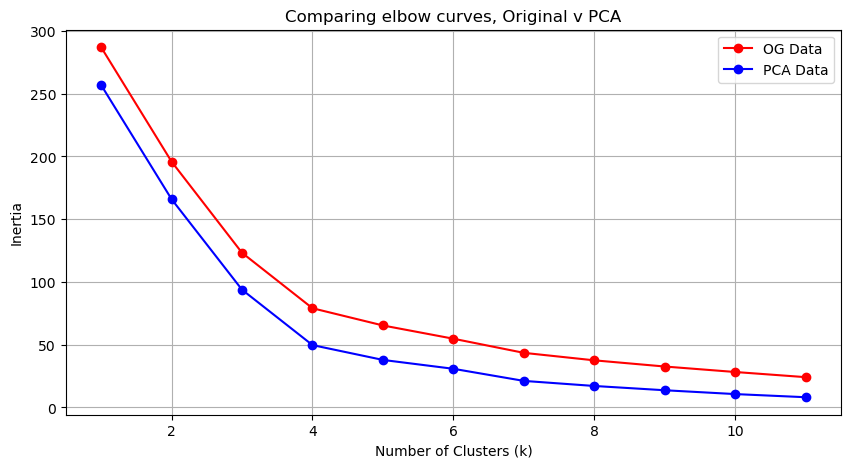

In [274]:
# Composite plot to contrast the Elbow curves
plt.figure(figsize=(10,5))
#original data elbow curve
plt.plot(k_values, inertia_values, marker="o", linestyle="-", color="red", label="OG Data")
#PCA data elbow curve
plt.plot(k_values_pca, inertia_values_pca, marker="o", linestyle="-", color="blue", label="PCA Data")

plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Comparing elbow curves, Original v PCA")
plt.legend()
plt.grid(True)
plt.show()

In [278]:
# Create a scatter plot for original data
scatter_plot_original = df_market_data_clusters_original.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="Cluster",
    hover_cols=["Cluster"],
    title="Original Data Clustering (K-Means)",
    xlabel="Price Change Percentage (24h)",
    ylabel="Price Change Percentage (7d)",
    width=500,
    height=500
)

# Create a scatter plot for PCA data
scatter_plot_pca = df_market_data_pca_clusters.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="Cluster",
    hover_cols=["Cluster"],
    title="PCA Data Clustering (K-Means)",
    xlabel="Principal Component 1 (PC1)",
    ylabel="Principal Component 2 (PC2)",
    width=500,
    height=500
)

# Arrange the plots in a single row layout
layout = scatter_plot_original + scatter_plot_pca

# Display the layout
layout

:Layout
   .NdOverlay.I  :NdOverlay   [Cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster)
   .NdOverlay.II :NdOverlay   [Cluster]
      :Scatter   [PC1]   (PC2,Cluster)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using PCA helps reduce dimensions for faster computation and less memory. It is also simpler and more clear. Some detail is lost through data compression, so it is less interpretable. 